In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


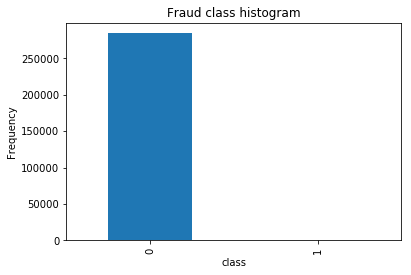

In [3]:
count_class = pd.value_counts(data['Class'], sort=True).sort_index()
count_class.plot(kind='bar')
plt.title("Fraud class histogram")
plt.xlabel('class')
plt.ylabel('Frequency')

In [4]:
from sklearn.preprocessing import StandardScaler

data['normAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))
data = data.drop(['Time', 'Amount'], axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [32]:
X = data.ix[:, data.columns != 'Class']
y = data.ix[:, data.columns == 'Class']

number_record_fraud = len(data[data.Class == 1])
fraud_indices = np.array(data[data.Class == 1].index)

normal_indices = np.array(data[data.Class == 0].index)

# 通过索引随机选择x
random_normal_indices = np.random.choice(normal_indices, number_record_fraud, replace=False)
random_normal_indices = np.array(random_normal_indices)

# 合并两种索引
under_sample_indices = np.concatenate([fraud_indices, random_normal_indices])

under_sample_data = data.iloc[under_sample_indices, :]

X_undersample = under_sample_data.iloc[:, under_sample_data.columns != 'Class']
y_undersample = under_sample_data.iloc[:, under_sample_data.columns == 'Class']

print("Percentage of normal transactions:", len(under_sample_data[under_sample_data.Class == 0]) / len(under_sample_data))
print("Percentage of fraud transactions", len(under_sample_data[under_sample_data.Class == 1]) / len(under_sample_data))
print("Total number of  transactions in data", len(under_sample_data))

Percentage of normal transactions: 0.5
Percentage of fraud transactions 0.5
Total number of  transactions in data 984


In [33]:
from sklearn.cross_validation import train_test_split

# 切分原始数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("Number of X_train=", len(X_train))
print("Number of X_test=", len(X_test))
print("Number of total=", len(X_train) + len(X_test))

# 对下采样数据进行切分
X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample = train_test_split(X_undersample, y_undersample, test_size=0.3, random_state=0)

print("\n")
print("Number of X_train_undersample=", len(X_train_undersample))
print("Number of X_test_undersample=", len(X_test_undersample))
print("Number of total_undersample=", len(X_train_undersample) + len(X_test_undersample))

Number of X_train= 199364
Number of X_test= 85443
Number of total= 284807


Number of X_train_undersample= 688
Number of X_test_undersample= 296
Number of total_undersample= 984


In [34]:
# Recall = TP/(TP+FN)
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.metrics import confusion_matrix, recall_score, classification_report

In [35]:
def printing_Kfold_scores(x_train_data, y_train_data):
    fold = KFold(len(y_train_data), 5, shuffle=False)
    
    # different c parameters
    c_param_range = [0.01, 0.1, 1, 10, 100]
    
    results_table = pd.DataFrame(index=range(len(c_param_range), 2), columns=['C_parameters', 'Mean recall score'])
    results_table['C_parameters'] = c_param_range
    
    # the k-fold will give 2 list: train_indices = indices[0], test_indices = indices[1]
    j = 0
    for c_param in c_param_range:
        print('-----------------------')
        print('C parameters', c_param)
        print('-----------------------','\n')
        
        recall_accs = []
        # enumerate枚举, start表示下标开始的位置
        for iteration, indices in enumerate(fold, start=1):
            # 惩罚系数为c_param,L1正则
            lr = LogisticRegression(C = c_param, penalty='l1')
            lr.fit(x_train_data.iloc[indices[0],:], y_train_data.iloc[indices[0],:].values.ravel())
            y_pred_unsersample = lr.predict(x_train_data.iloc[indices[1],:])
            recall_acc = recall_score(y_train_data.iloc[indices[1],:].values, y_pred_unsersample)
            recall_accs.append(recall_acc)
            print('Iteration', iteration, ": recall score = ", recall_acc)
            
        results_table.ix[j, "Mean recall score"] = np.mean(recall_accs)
        j += 1
        print(" ")
        print("Mean recall score:", np.mean(recall_accs), "\n")
        
    base_c = results_table.loc[results_table["Mean recall score"].idxmax()]['C_parameters']
    
    print("*************************")
    print("Best c_param = ", base_c)
    print("*************************")
    
    return base_c

In [36]:
base_c = printing_Kfold_scores(X_train_undersample, y_train_undersample)

-----------------------
C parameters 0.01
----------------------- 

Iteration 1 : recall score =  0.9315068493150684
Iteration 2 : recall score =  0.9178082191780822
Iteration 3 : recall score =  0.9830508474576272
Iteration 4 : recall score =  0.972972972972973
Iteration 5 : recall score =  0.9393939393939394
 
Mean recall score: 0.948946565663538 

-----------------------
C parameters 0.1
----------------------- 

Iteration 1 : recall score =  0.8356164383561644
Iteration 2 : recall score =  0.863013698630137
Iteration 3 : recall score =  0.9152542372881356
Iteration 4 : recall score =  0.9324324324324325
Iteration 5 : recall score =  0.8787878787878788
 
Mean recall score: 0.8850209370989497 

-----------------------
C parameters 1
----------------------- 

Iteration 1 : recall score =  0.8356164383561644
Iteration 2 : recall score =  0.8767123287671232
Iteration 3 : recall score =  0.9661016949152542
Iteration 4 : recall score =  0.9459459459459459
Iteration 5 : recall score =  0.8

/Users/pengyi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/pengyi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/pengyi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/pengyi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/pengyi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to '

Iteration 3 : recall score =  0.9830508474576272
Iteration 4 : recall score =  0.9459459459459459
Iteration 5 : recall score =  0.8939393939393939
 
Mean recall score: 0.9097927169206482 

-----------------------
C parameters 100
----------------------- 

Iteration 1 : recall score =  0.8493150684931506


/Users/pengyi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/pengyi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/pengyi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/pengyi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration 2 : recall score =  0.8767123287671232


/Users/pengyi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration 3 : recall score =  0.9830508474576272
Iteration 4 : recall score =  0.9459459459459459
Iteration 5 : recall score =  0.8939393939393939
 
Mean recall score: 0.9097927169206482 

*************************
Best c_param =  0.01
*************************


/Users/pengyi/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/pengyi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/pengyi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [37]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [38]:
credit_cards = pd.read_csv("creditcard.csv")

columns = credit_cards.columns
# 特征列为除去labels列'Class'
feature_columns = columns.delete(len(columns) - 1)
features = credit_cards[feature_columns]
lables = credit_cards['Class']

In [39]:
# 切分train, test
feature_train, feature_test, labels_train, labels_test = train_test_split(features, lables, 
                                                                          test_size = 0.2, random_state=0)

In [40]:
# 生成过采样数据
oversampler = SMOTE(random_state=0)
os_features, os_labels = oversampler.fit_sample(feature_train, labels_train)

In [41]:
# 查看生成后的0,1个数,生成后会一样多
len(os_labels[os_labels==1]), len(os_labels[os_labels==0])

(227454, 227454)

In [51]:
os_features = pd.DataFrame(os_features)
os_labels = pd.DataFrame(os_labels)
best_c = printing_Kfold_scores(os_features, os_labels) 

-----------------------
C parameters 0.01
----------------------- 



/Users/pengyi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration 1 : recall score =  0.8903225806451613


/Users/pengyi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration 2 : recall score =  0.8947368421052632


/Users/pengyi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration 3 : recall score =  0.9687506916011951


/Users/pengyi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration 4 : recall score =  0.9578483419615085


/Users/pengyi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration 5 : recall score =  0.958397907255361
 
Mean recall score: 0.9340112727136978 

-----------------------
C parameters 0.1
----------------------- 



/Users/pengyi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/Users/pengyi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration 1 : recall score =  0.8903225806451613


/Users/pengyi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration 2 : recall score =  0.8947368421052632


/Users/pengyi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration 3 : recall score =  0.96855151045701


/Users/pengyi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration 4 : recall score =  0.9498356799771381


/Users/pengyi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration 5 : recall score =  0.9604752640661237
 
Mean recall score: 0.9327843754501393 

-----------------------
C parameters 1
----------------------- 



/Users/pengyi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration 1 : recall score =  0.8903225806451613


/Users/pengyi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration 2 : recall score =  0.8947368421052632


/Users/pengyi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration 3 : recall score =  0.9705433218988603


/Users/pengyi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration 4 : recall score =  0.9595739769842055


/Users/pengyi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration 5 : recall score =  0.9608599597718205
 
Mean recall score: 0.9352073362810621 

-----------------------
C parameters 10
----------------------- 



/Users/pengyi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration 1 : recall score =  0.8903225806451613


/Users/pengyi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration 2 : recall score =  0.8947368421052632


/Users/pengyi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration 3 : recall score =  0.9703441407546752


/Users/pengyi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration 4 : recall score =  0.9603873336191073


/Users/pengyi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration 5 : recall score =  0.9608269858541894
 
Mean recall score: 0.9353235765956793 

-----------------------
C parameters 100
----------------------- 



/Users/pengyi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration 1 : recall score =  0.8903225806451613


/Users/pengyi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration 2 : recall score =  0.8947368421052632


/Users/pengyi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration 3 : recall score =  0.9704547969458891


/Users/pengyi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration 4 : recall score =  0.9597168639606072


/Users/pengyi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Iteration 5 : recall score =  0.9608819423835746
 
Mean recall score: 0.935222605208099 

*************************
Best c_param =  10.0
*************************


In [52]:
import itertools
def plot_cnf_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
    
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color='white' if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

/Users/pengyi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Recall metric in testing dataset: 0.9108910891089109


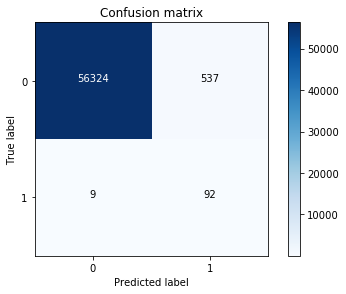

In [53]:
lr = LogisticRegression(C = best_c, penalty = 'l1')
lr.fit(os_features, os_labels.values.ravel())
y_pred = lr.predict(feature_test.values)

# 计算混淆矩阵
cnf_matrix = confusion_matrix(labels_test, y_pred)
np.set_printoptions(precision=2)

print("Recall metric in testing dataset:", cnf_matrix[1, 1]/(cnf_matrix[1, 0] + cnf_matrix[1, 1]))

# 画出混淆矩阵
class_names = [0, 1]
plt.figure()
plot_cnf_matrix(cnf_matrix, classes=class_names)

/Users/pengyi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Recall metric in the testing dataset:  1.0
Recall metric in the testing dataset:  1.0
Recall metric in the testing dataset:  1.0
Recall metric in the testing dataset:  0.9727891156462585
Recall metric in the testing dataset:  0.9251700680272109
Recall metric in the testing dataset:  0.8707482993197279
Recall metric in the testing dataset:  0.8163265306122449
Recall metric in the testing dataset:  0.7551020408163265
Recall metric in the testing dataset:  0.564625850340136


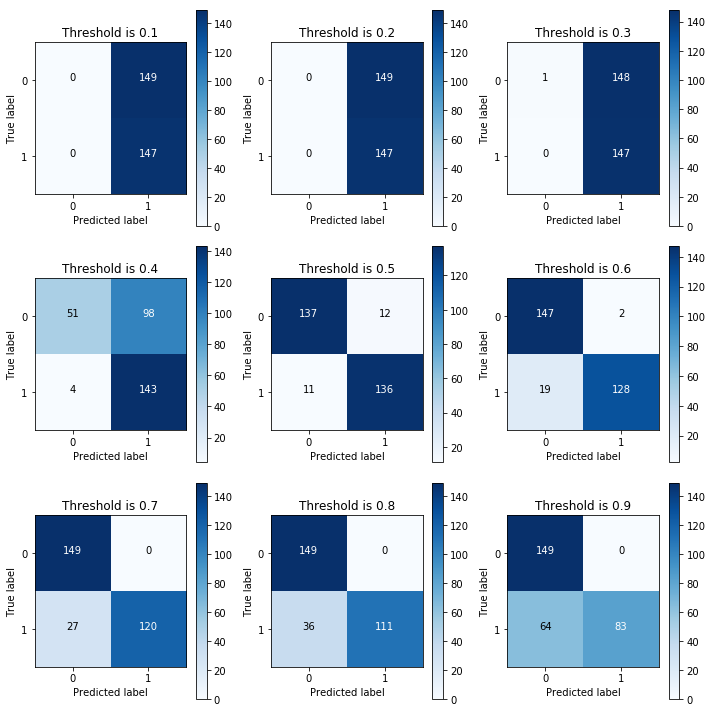

In [57]:
lr = LogisticRegression(C=0.01, penalty='l1')
lr.fit(X_train_undersample, y_train_undersample.values.ravel())
y_pred_undersample_proba = lr.predict_proba(X_test_undersample.values)

threshold = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

plt.figure(figsize=(10, 10))
j = 1
for i in threshold:
    y_test_predictions_high_recall = y_pred_undersample_proba[:,1] > i
    
    plt.subplot(3,3,j)
    j += 1
    
    # 计算混淆矩阵
    cnf_matrix = confusion_matrix(y_test_undersample, y_test_predictions_high_recall)
    np.set_printoptions(precision=2)
    
    print("Recall metric in the testing dataset: ", cnf_matrix[1, 1]/(cnf_matrix[1,0] + cnf_matrix[1,1]))
    
    # 画图
    class_names = [0, 1]
    plot_cnf_matrix(cnf_matrix, classes=class_names, title="Threshold is %s" % i)